In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import cross_validation 
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import scipy.sparse as sparse
from sklearn.neighbors import kneighbors_graph

feature_vector_al = np.load("featureVec_al.npy")
feature_vector_co = np.load("featureVec_co.npy")
# Stack feature vectors of alcoholics and controls and separate out the target vectors.

X = np.vstack((feature_vector_al[:,:-1],feature_vector_co[:,:-1]))
y = np.hstack((feature_vector_al[:,-1],feature_vector_co[:,-1]))

X_ = np.nan_to_num(X) # precaution to remove any nan values.

# split into train and test set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X_,y,test_size = 0.2 , random_state = 0)

In [13]:
# search for an optimal value of K for KNN
# range of k we want to try
k_range = range(1, 10)
# empty list to store scores
k_scores = []

for k in k_range:
    # eval knn for `k` neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    # append 3 fold cross val score
    scores = cross_val_score(knn, X, y, cv=3, scoring='accuracy')
    k_scores.append(scores.mean())

print(k_scores)

[0.6388888888888888, 0.7222222222222223, 0.6944444444444445, 0.75, 0.7777777777777778, 0.7222222222222223, 0.6666666666666666, 0.75, 0.6666666666666666]


Text(0,0.5,'Score Value')

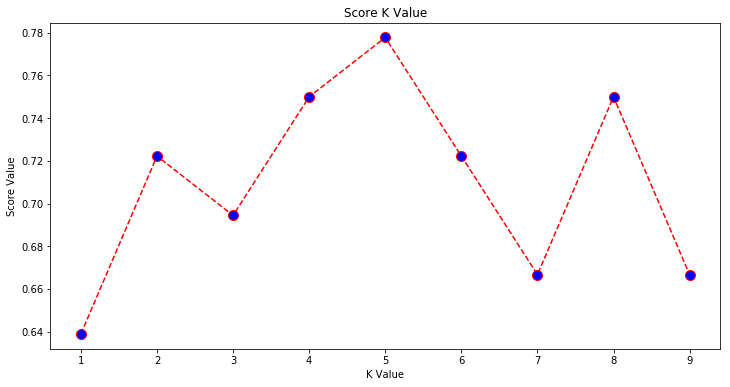

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), k_scores, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Score K Value')
plt.xlabel('K Value')
plt.ylabel('Score Value')


In [15]:
# 3fold cross-validation with K=5 for KNN
# k = 5 for KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Use cross_val_score function
# cv=3 for 3 folds
# using accuracy as the scoring metric
# input dataset is x and y i.e stacked feature vectors
scores = cross_val_score(knn, X, y, cv=3, scoring='accuracy')
print(scores)

# use average accuracy as an estimate of out-of-sample accuracy
# numpy array has a method mean()
print(scores.mean())


[0.83333333 1.         0.5       ]
0.7777777777777778


In [ ]:
# Use cross_val_score function
# cv=3 for 3 folds
# using accuracy as the scoring metric
# input dataset is x and y i.e stacked feature vectors
scores = cross_val_score(knn, X, y, cv=3, scoring='f1_score')
print(scores)

# use average accuracy as an estimate of out-of-sample accuracy
# numpy array has a method mean()
print(scores.mean())


In [26]:
# compute weighted graph of 5-nearest neightbors

sparse_dist = kneighbors_graph(X, 5, mode='distance', include_self=True)
sparse_dist_m = sparse.toarray()
sparse_dist_m

array([[1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0.,

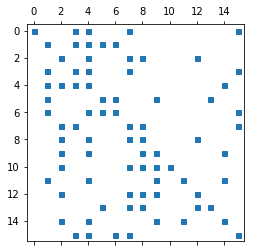

In [27]:
plt.spy(sparse_dist_m, markersize=5)

In [35]:
# compute weighted graph of 5-nearest neightbors
from sklearn.neighbors import radius_neighbors_graph
radius_graph = radius_neighbors_graph(X, 1.5, mode='connectivity', include_self=True)
radius_graph_m = radius_graph.toarray()
radius_graph_m

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

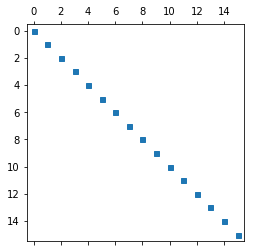

In [36]:
plt.spy(radius_graph_m, markersize=5)

In [231]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(240, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])


In [232]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [233]:
model.fit(X_train, y_train, epochs=4)


Epoch 1/4
12/12 [==============================] - 1s 50ms/step - loss: 1.2407 - acc: 0.5000
Epoch 2/4
12/12 [==============================] - 0s 237us/step - loss: 0.4086 - acc: 0.7500
Epoch 3/4
12/12 [==============================] - 0s 273us/step - loss: 0.0841 - acc: 1.0000
Epoch 4/4
12/12 [==============================] - 0s 288us/step - loss: 0.0192 - acc: 1.0000


In [234]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)



Test accuracy: 0.75
